# Problem Statement

Wine Quality Prediction-
Here, we will apply a method of assessing wine quality using a decision tree, and test it against the wine-quality dataset from the UC Irvine Machine Learning Repository.



The wine dataset is a classic and very easy multi-class classification dataset.
Find more about data here - https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [1]:
#Import all the necessary modules
# Import Basic Libraries
import numpy as np
import pandas as pd

# Import Datavisualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set Theme for Data Visualization
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

# Import Libraries for Statistical Analysis
import scipy.stats as stats

# Import Libraries for Classification Model Building
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classfier
from sklearn.ensemble import BaggingClassifier #Bagging Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Import Libraries for Train-Test split and Metric calculation
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Q1. Load the Wine Data file into Python DataFrame. 


Let us assume the data frame is named wine_df


In [2]:
wine_df = pd.read_csv("winequality-red.csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

# Q2. Print 10 samples from the dataset

In [3]:
wine_df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# Q3 Print the datatypes of each column and the shape of the dataset 

In [4]:
print("Datatype:\n",wine_df.dtypes,"\n")
print("Shape of Dataset:\n",wine_df.shape)

Datatype:
 fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object 

Shape of Dataset:
 (1599, 12)


In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Q4 Print the descriptive statistics of each & every column using describe() function

In [11]:
round(wine_df.describe().transpose(),3)

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.320,1.741,4.600,7.100,7.900,9.200,15.900
volatile_acidity,1599.0,0.528,0.179,0.120,0.390,0.520,0.640,1.580
citric_acid,1599.0,0.271,0.195,0.000,0.090,0.260,0.420,1.000
residual_sugar,1599.0,2.539,1.410,0.900,1.900,2.200,2.600,15.500
chlorides,1599.0,0.087,0.047,0.012,0.070,0.079,0.090,0.611
free_sulfur_dioxide,1599.0,15.875,10.460,1.000,7.000,14.000,21.000,72.000
total_sulfur_dioxide,1599.0,46.468,32.895,6.000,22.000,38.000,62.000,289.000
density,1599.0,0.997,0.002,0.990,0.996,0.997,0.998,1.004
pH,1599.0,3.311,0.154,2.740,3.210,3.310,3.400,4.010
sulphates,1599.0,0.658,0.170,0.330,0.550,0.620,0.730,2.000


In [13]:
# Creating a Class column from the 'quality'

wine_df['class'] = np.where(wine_df['quality']>=7, 1, 0)
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [14]:
# Data Distribution of 'class' across all variables
wine_df.groupby(["class"]).count()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
class,,,,,,,,,,,,
0,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382,1382
1,217,217,217,217,217,217,217,217,217,217,217,217


# Q5 Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes).

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed_acidity, dtype: float64


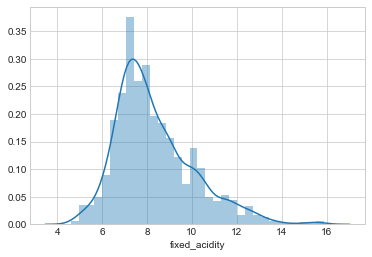

In [15]:
#1. Fixed Acidity

print(wine_df['fixed_acidity'].describe().transpose())
sns.distplot(wine_df['fixed_acidity'])

count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile_acidity, dtype: float64


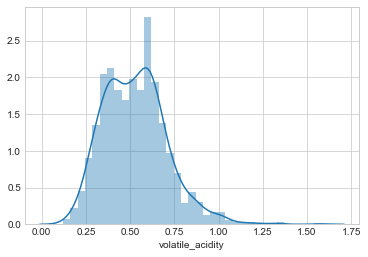

In [16]:
#2. Volatile Acidity

print(wine_df['volatile_acidity'].describe().transpose())
sns.distplot(wine_df['volatile_acidity'])

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64


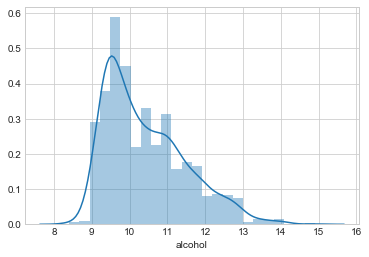

In [17]:
#3. Alcohol

print(wine_df['alcohol'].describe().transpose())
sns.distplot(wine_df['alcohol'])

'alcohol' and 'fixed_acidity' show skewed distribution in data but in case of 'volatile_acidity' we can see bi-modal distribution.

# Q6. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


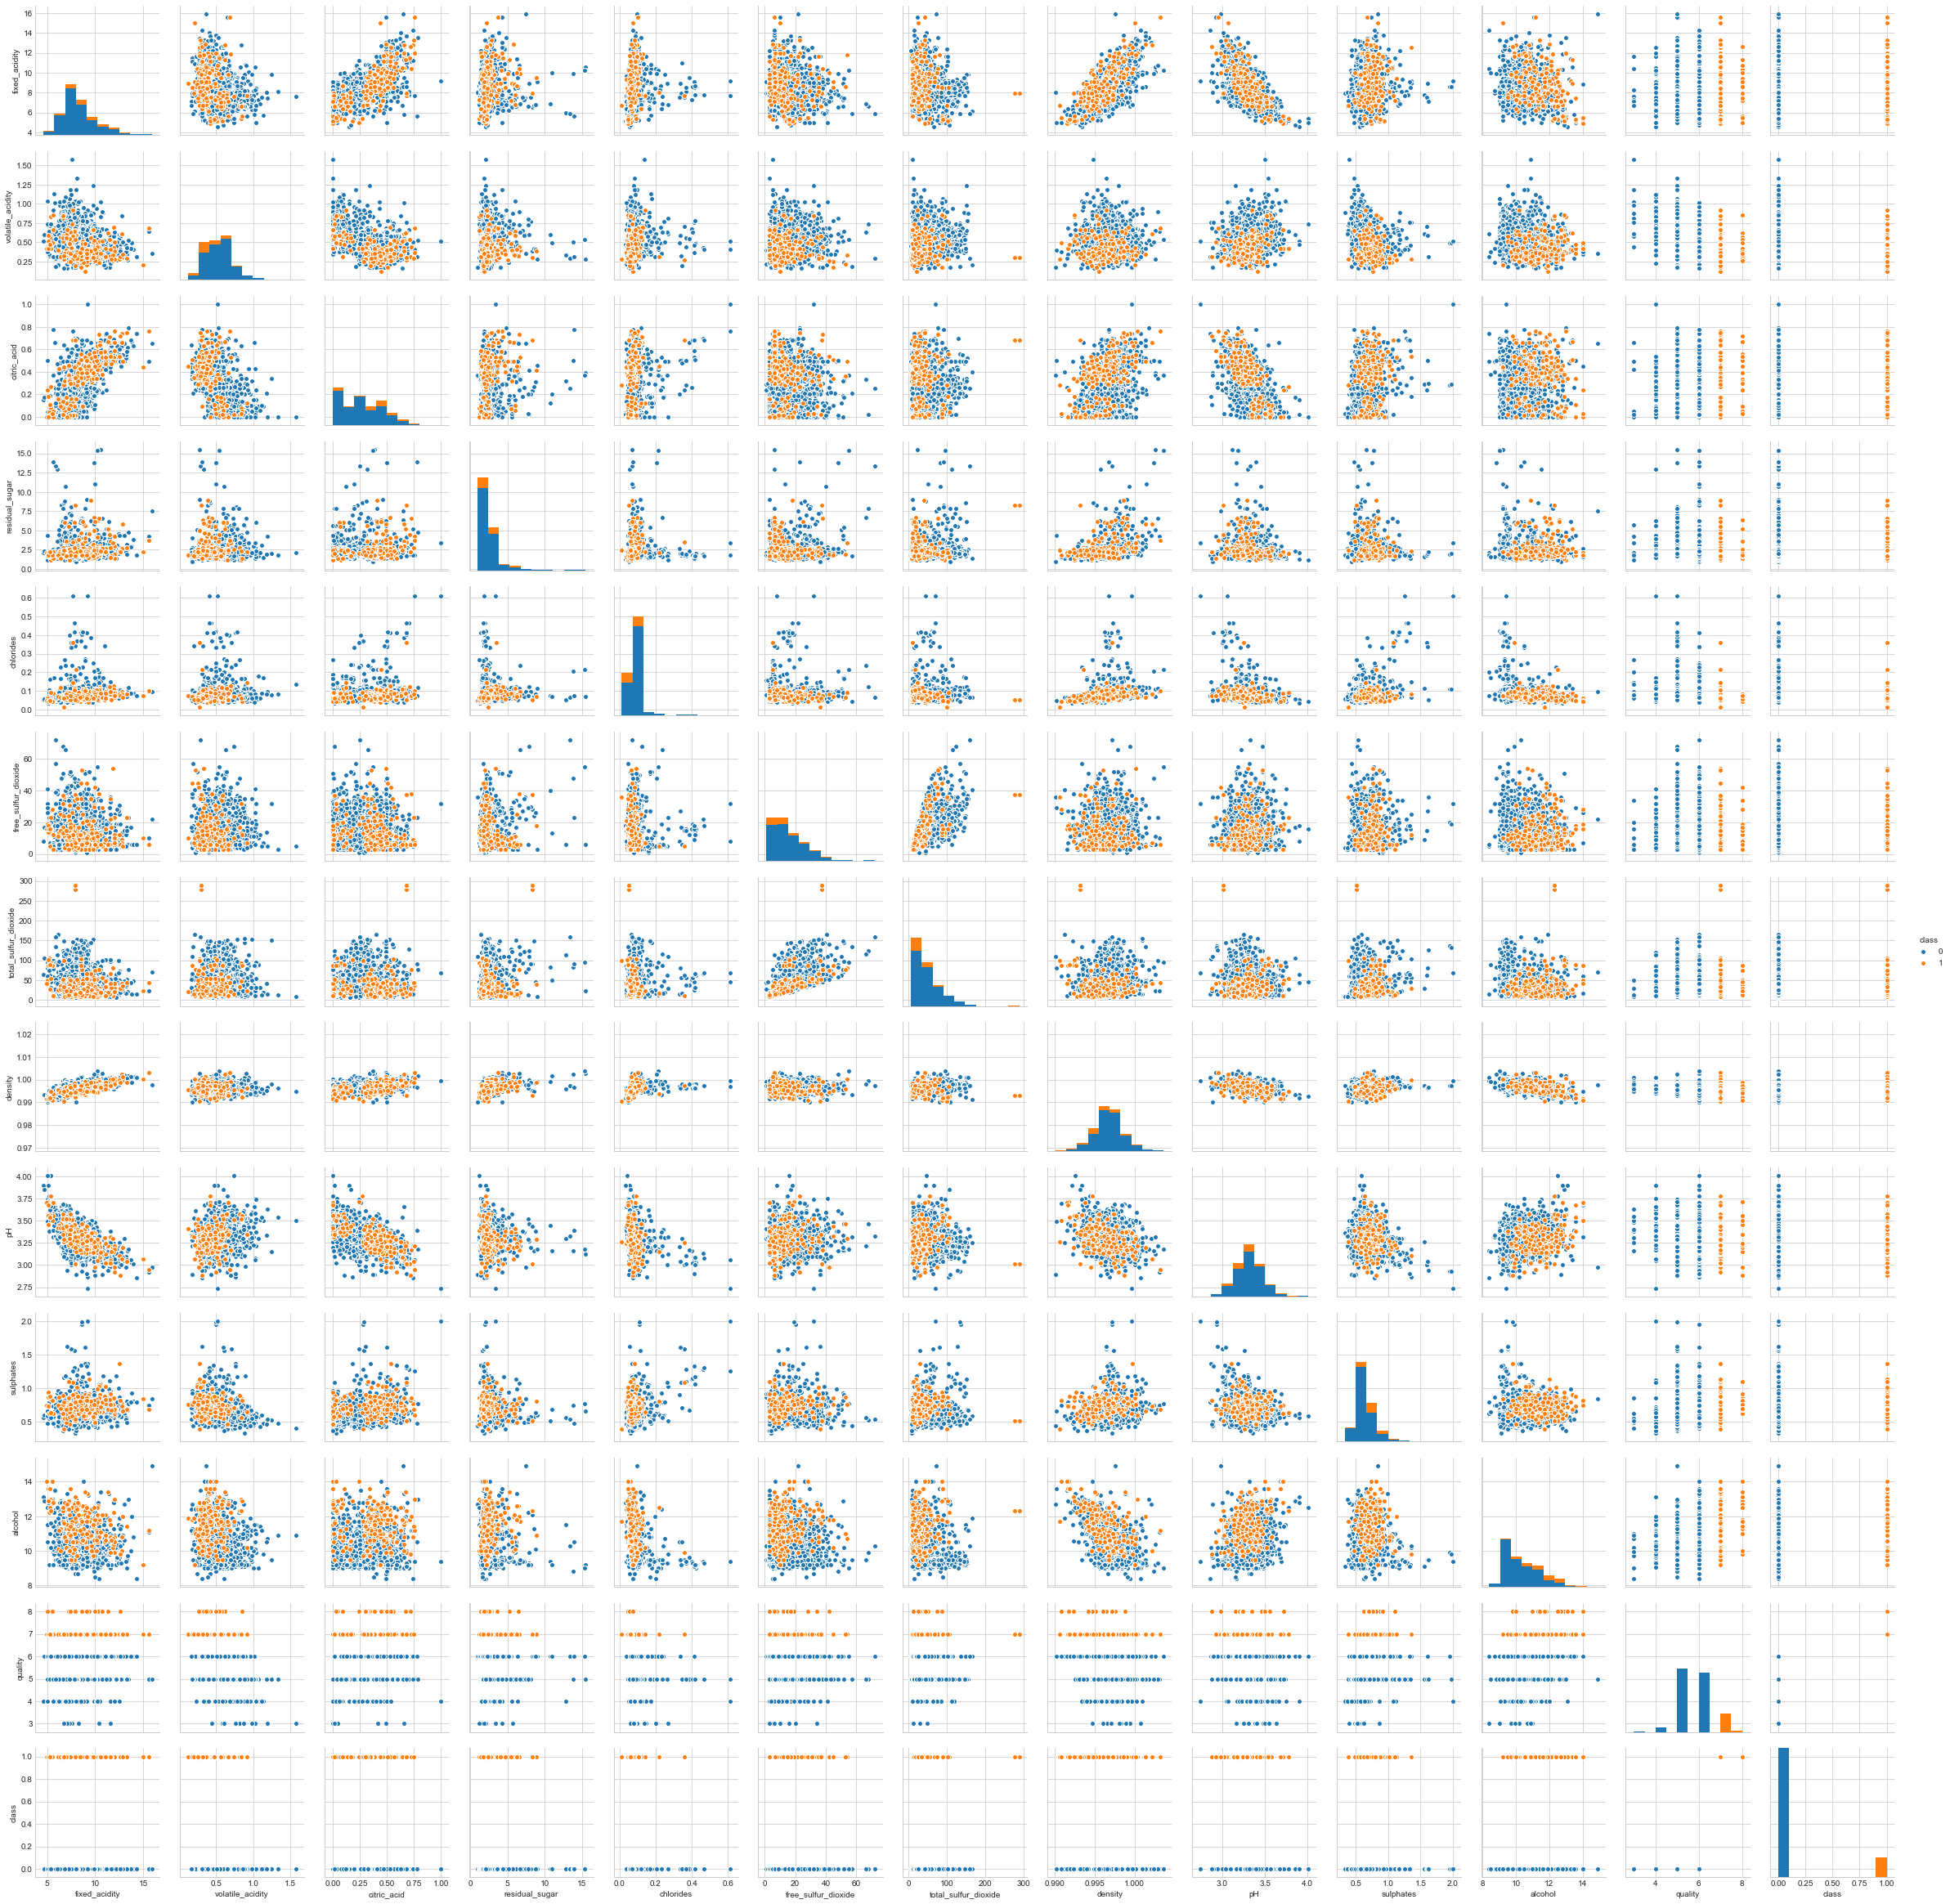

In [18]:
# 1 Pair Plot between the variables
sns.pairplot(wine_df,hue='class')

In [ ]:
# Attributes which look normally distributed (PH & Density).
# Some of the attributes look like they may have an exponential distribution (Residual Sugar, Chlorides, total_sulfur_dioxide & sulphates).

# Fixed acidity,Volatile acidity, citric acid,free sulphurdioxide & alcohol should probably have a normal distribution, the constraints on the data collection may have skewed the distribution.

# Strong relationship exist between the quality of wine with PH & density
# wheareas Fixed acidity,Volatile acidity, citric acid,free sulphurdioxide & alcohol do have an impact on qulaity of wine

# Q7 Split the wine_df into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.



Note: Using 'wine_df' for model building - which is with the outliers.

In [24]:
wine_df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class'],
      dtype='object')

In [25]:
# Dependent Variable
Y = wine_df['class']

# Independent Variable
X = wine_df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

print("Shape of Dependent Variable:\n", Y.shape,"\n")
print("Shape of Independent Variable:\n", X.shape)

Shape of Dependent Variable:
 (1599,) 

Shape of Independent Variable:
 (1599, 11)


###### Splitting dataset into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables

In [26]:
# Dividing the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
# random state is setting up a seed value

# Shape of training and tst feature set
print("Shape of X Train:\t",X_train.shape)
print("Shape of X Test:\t",X_test.shape)
print("Shape of Y Train:\t",Y_train.shape)
print("Shape of Y Test:\t",Y_test.shape)

Shape of X Train:	 (1119, 11)
Shape of X Test:	 (480, 11)
Shape of Y Train:	 (1119,)
Shape of Y Test:	 (480,)


# Q8 Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.




In [27]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

# Model building on training dataset
dt_model.fit(X_train, Y_train)

# Prediction
dt_predict = dt_model.predict(X_test)

# Q9 Print the accuracy of the model & print the confusion matrix 

In [28]:
# Accuracy of Model
print("Accuracy on Training Set with Decision Tree:",dt_model.score(X_train,Y_train))
print("Accuracy on Testing Set with Decision Tree:",dt_model.score(X_test,Y_test))

# Confusion Matrix for Decision Tree Classification Model
pd.DataFrame(metrics.confusion_matrix(Y_test, dt_predict))

Accuracy on Training Set with Decision Tree: 1.0
Accuracy on Testing Set with Decision Tree: 0.8541666666666666


,0,1
0,372,45
1,25,38


100% accuracy in Training Set, looks likely to be the case for overfit

In [29]:
# Feature Importance of Decision Tree
feature = (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns)).sort_values("Imp", ascending = False)
feature

,Imp
alcohol,0.266209
volatile_acidity,0.138570
sulphates,0.120399
total_sulfur_dioxide,0.093659
pH,0.077706
chlorides,0.074422
density,0.063335
fixed_acidity,0.053234
residual_sugar,0.052392
free_sulfur_dioxide,0.036556


# Q10. Regularize the decision tree by limiting the max. depth of trees and print the accuracy.

In [30]:
# Regularized Decision Tree Classifier
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 15)

# Model building on training dataset
reg_dt_model.fit(X_train, Y_train)

# Prediction
reg_dt_predict = reg_dt_model.predict(X_test)

In [31]:
# Accuracy of Model
print("Accuracy on Training Set with Regularized Decision Tree:",reg_dt_model.score(X_train,Y_train))
print("Accuracy on Testing Set with Regularized Decision Tree:",reg_dt_model.score(X_test,Y_test))

# Confusion Matrix for Regularized Decision Tree Classification Model
pd.DataFrame(metrics.confusion_matrix(Y_test, reg_dt_predict))

Accuracy on Training Set with Regularized Decision Tree: 1.0
Accuracy on Testing Set with Regularized Decision Tree: 0.8625


,0,1
0,378,39
1,27,36


In [32]:
# Feature Importance of Regularixed Decision Tree
feature = (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns)).sort_values("Imp", ascending = False)
feature

,Imp
alcohol,0.264284
volatile_acidity,0.111930
total_sulfur_dioxide,0.103899
sulphates,0.098285
pH,0.084136
residual_sugar,0.078687
density,0.063459
chlorides,0.062362
fixed_acidity,0.054542
free_sulfur_dioxide,0.051536


# Q11 Apply the Random forest model and print the accuracy of Random forest Model

In [33]:
# Random Forest Classifier
rfcl = RandomForestClassifier(n_estimators=100)

# Model building on training dataset
rfcl.fit(X_train, Y_train)

# Prediction
rfcl_predict = rfcl.predict(X_test)

In [34]:
# Accuracy of Model
print("Accuracy on Training Set with Random forest:",rfcl.score(X_train,Y_train))
print("Accuracy on Testing Set with Random forest:",rfcl.score(X_test,Y_test))

# Confusion Matrix for Random Forest
pd.DataFrame(metrics.confusion_matrix(Y_test,rfcl_predict))

Accuracy on Training Set with Random forest: 1.0
Accuracy on Testing Set with Random forest: 0.9166666666666666


,0,1
0,406,11
1,29,34


In [35]:
# Feature Importance of Random Forest
feature = (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns)).sort_values("Imp", ascending = False)
feature

,Imp
alcohol,0.174904
sulphates,0.126016
volatile_acidity,0.107935
density,0.095618
citric_acid,0.083260
total_sulfur_dioxide,0.079877
fixed_acidity,0.077235
chlorides,0.073184
residual_sugar,0.065738
pH,0.058457


# Q12 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [36]:
# Adaboost Ensemble Classifier
abcl = AdaBoostClassifier(n_estimators=100)

# Model building on training dataset
abcl.fit(X_train, Y_train)

# Prediction
abcl_predict = abcl.predict(X_test)

In [37]:
# Accuracy of Model
print("Accuracy on Training Set with Adaboost Ensemble:",abcl.score(X_train,Y_train))
print("Accuracy on Testing Set with Adaboost Ensemble:",abcl.score(X_test,Y_test))

# Confusion Matrix for Adaboost Ensemble
pd.DataFrame(metrics.confusion_matrix(Y_test,abcl_predict))

Accuracy on Training Set with Adaboost Ensemble: 0.9285075960679178
Accuracy on Testing Set with Adaboost Ensemble: 0.8833333333333333


,0,1
0,394,23
1,33,30


In [38]:
# Feature Importance of Adaboost Ensemble
feature = (pd.DataFrame(abcl.feature_importances_, columns = ["Imp"], index = X_train.columns)).sort_values("Imp", ascending = False)
feature

,Imp
fixed_acidity,0.14
citric_acid,0.14
chlorides,0.11
free_sulfur_dioxide,0.11
sulphates,0.11
total_sulfur_dioxide,0.10
alcohol,0.09
density,0.08
pH,0.05
residual_sugar,0.04


# Q13 - Apply Bagging Classifier Algorithm and print the accuracy.

In [39]:
# Bagging Classifier
bgcl = BaggingClassifier(n_estimators=100)

# Model building on training dataset
bgcl.fit(X_train, Y_train)

# Prediction
bgcl_predict = bgcl.predict(X_test)

In [40]:
# Accuracy of Model
print("Accuracy on Training Set with Bagging Classifier:",bgcl.score(X_train,Y_train))
print("Accuracy on Testing Set with Bagging Classifier:",bgcl.score(X_test,Y_test))

# Confusion Matrix for Bagging Classifier
pd.DataFrame(metrics.confusion_matrix(Y_test,bgcl_predict))

Accuracy on Training Set with Bagging Classifier: 1.0
Accuracy on Testing Set with Bagging Classifier: 0.89375


,0,1
0,394,23
1,28,35


# Q14 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [41]:
# GradientBoost Classifier
gbcl = GradientBoostingClassifier(n_estimators = 100)

# Model building on training dataset
gbcl.fit(X_train, Y_train)

# Prediction
gbcl_predict = gbcl.predict(X_test)

In [42]:
# Accuracy of Model
print("Accuracy on Training Set with GradientBoost Classifier:",gbcl.score(X_train,Y_train))
print("Accuracy on Testing Set with GradientBoost Classifier:",gbcl.score(X_test,Y_test))

# Confusion Matrix for Gradient Classifier
pd.DataFrame(metrics.confusion_matrix(Y_test,gbcl_predict))

Accuracy on Training Set with GradientBoost Classifier: 0.9722966934763181
Accuracy on Testing Set with GradientBoost Classifier: 0.8979166666666667


,0,1
0,395,22
1,27,36


In [43]:
# Feature Importance of GradientBoost
feature = (pd.DataFrame(gbcl.feature_importances_, columns = ["Imp"], index = X_train.columns)).sort_values("Imp", ascending = False)
feature

,Imp
alcohol,0.132634
citric_acid,0.112843
sulphates,0.109993
density,0.107514
volatile_acidity,0.098377
total_sulfur_dioxide,0.087664
pH,0.084581
residual_sugar,0.083799
chlorides,0.069828
fixed_acidity,0.061997


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.